In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [4]:
#loading dataset
#creating database connection
conn = sqlite3.connect('inventory.db')
#fetching vendor summary data
df = pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,actualprice,Volume,totalpurchasequantity,totalpurchasedollars,totalsalesdollars,totalsalesprice,totalsalesquantity,totalexcisetax,FreightCost,grossprofit,profitmargin,stockturnover,salestopurchaseratio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5101919.51,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4819073.49,561512.37,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4538120.60,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4475972.88,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4223107.62,545778.28,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


eda
* previously, we examined the various tables in the database to identify key variables, understand their relationships and determine which ones should be include in the final analysis.
* in this phase of eda, we will analyze the resultant table to gain insights into the distribution of each column. this will help us understand data patterns, identify anomalies, and ensure data quality before processing with future analysis.

In [8]:
#summary statistics
df.describe().T #here T is transpose
#if you observe the table properly we can see the minimum grossprofit is -value whivh says it went in loss, and where ever zero it defines that the product was purchased but never sold, in profit margin the values r divide by 0 hence it gave inf vales


,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
actualprice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
totalpurchasequantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
totalpurchasedollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
totalsalesdollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
totalsalesprice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05
totalsalesquantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05


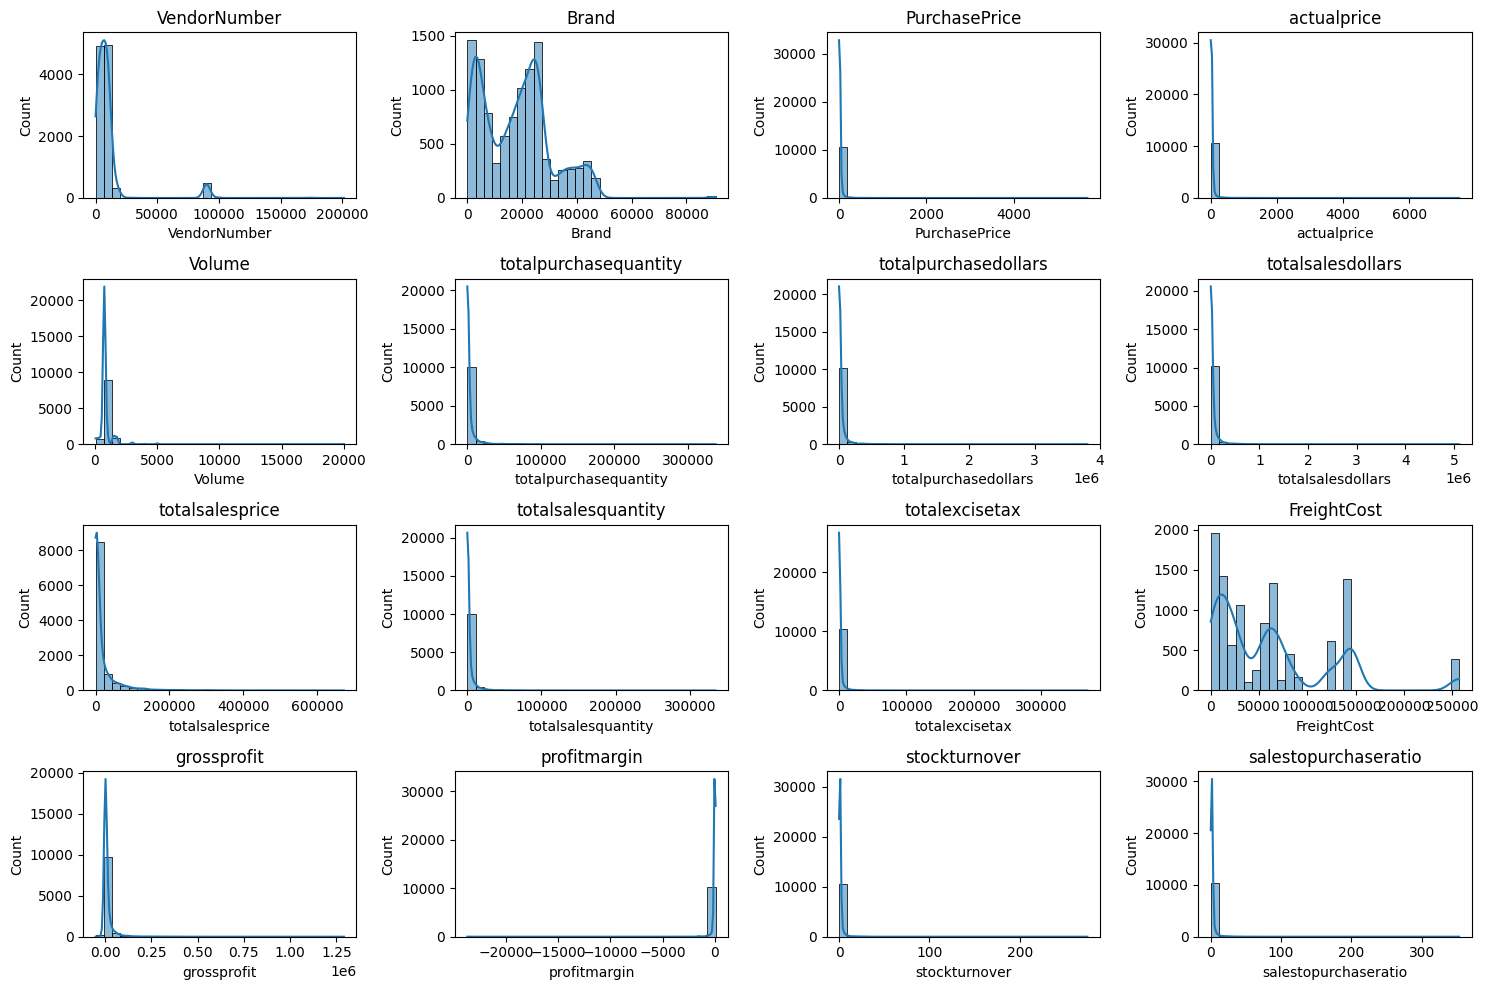

In [12]:
numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) #adjust grid layout as needed
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

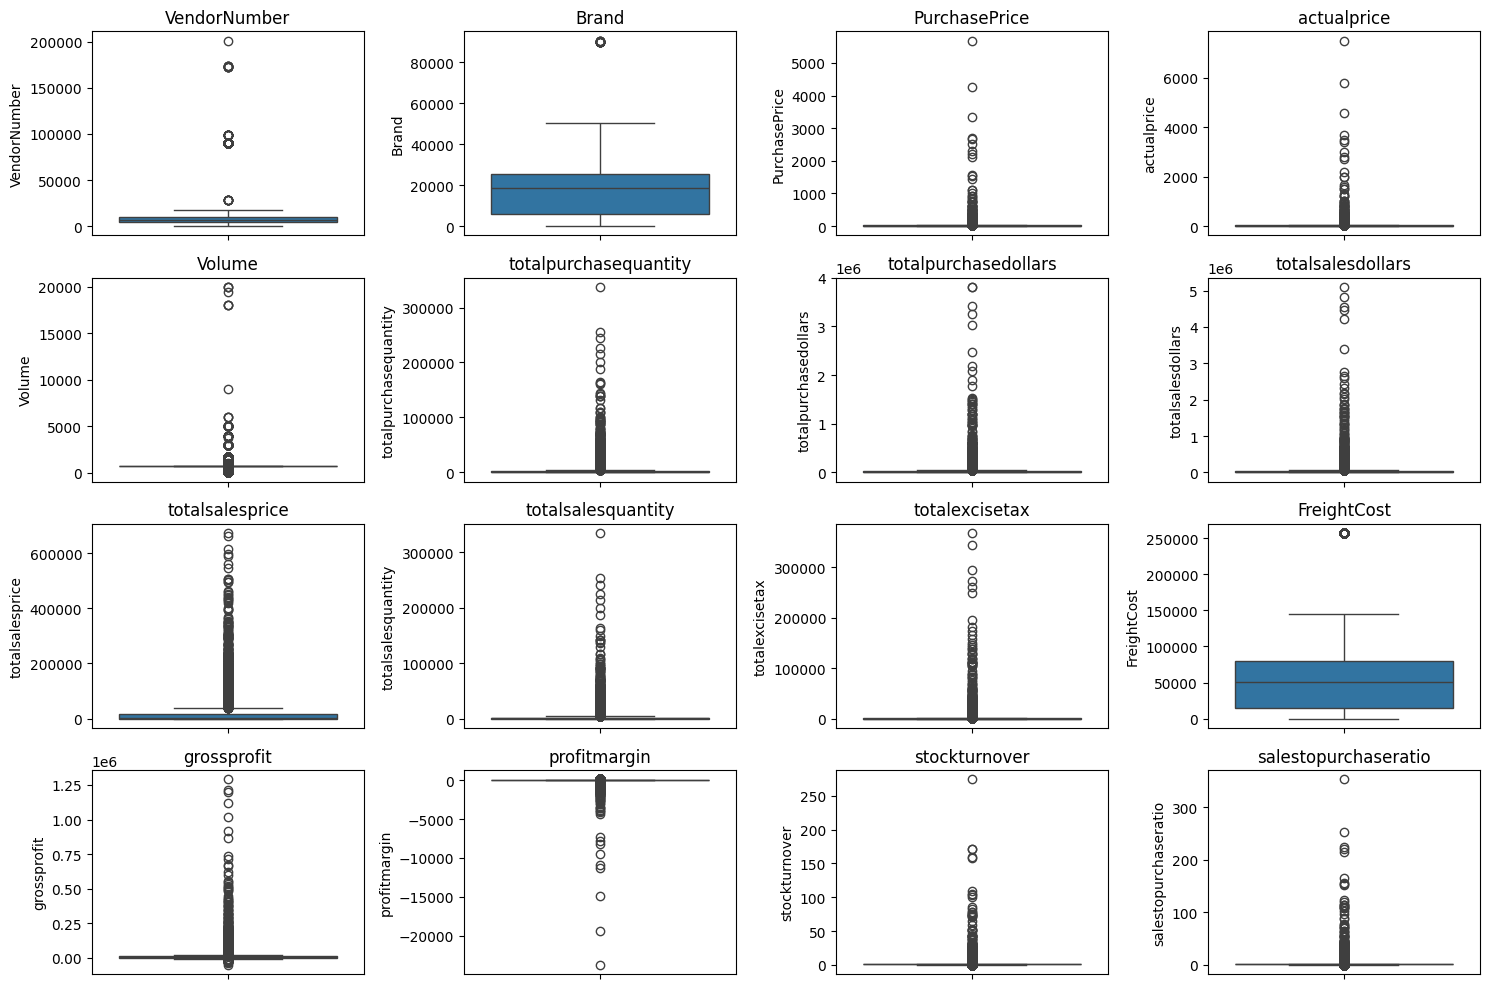

In [15]:
#outlier detection using boxplot
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) #adjust grid layout as needed
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Summary Statistics Insights:

Negative & Zero Values:

1. Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price..
2. Profit Margin: Has a minimum of-oo, which suggests cases where revenue is zero or even lower than costs.
3. Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

Outliers Indicated by High Standard Deviations:
1. Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
2. Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
3. Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [16]:
#we have to filter the data by removing inconsistencies. always remember when you come across inconsistensies first note on which dataset you r working upon 
#coz sometimes few products would be in the premium due to which it may fall under the outliers.
df = pd.read_sql_query("""select * 
from vendor_sales_summary
where grossprofit > 0
and profitmargin > 0
and totalsalesquantity > 0""",conn)

In [17]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,actualprice,Volume,totalpurchasequantity,totalpurchasedollars,totalsalesdollars,totalsalesprice,totalsalesquantity,totalexcisetax,FreightCost,grossprofit,profitmargin,stockturnover,salestopurchaseratio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5101919.51,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4819073.49,561512.37,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4538120.60,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4475972.88,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4223107.62,545778.28,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,15.95,10.96,5.0,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,65.66,1.47,134.0,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,1.98,0.99,2.0,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,143.28,77.61,72.0,15.12,257032.07,141.81,98.974037,72.000000,97.469388


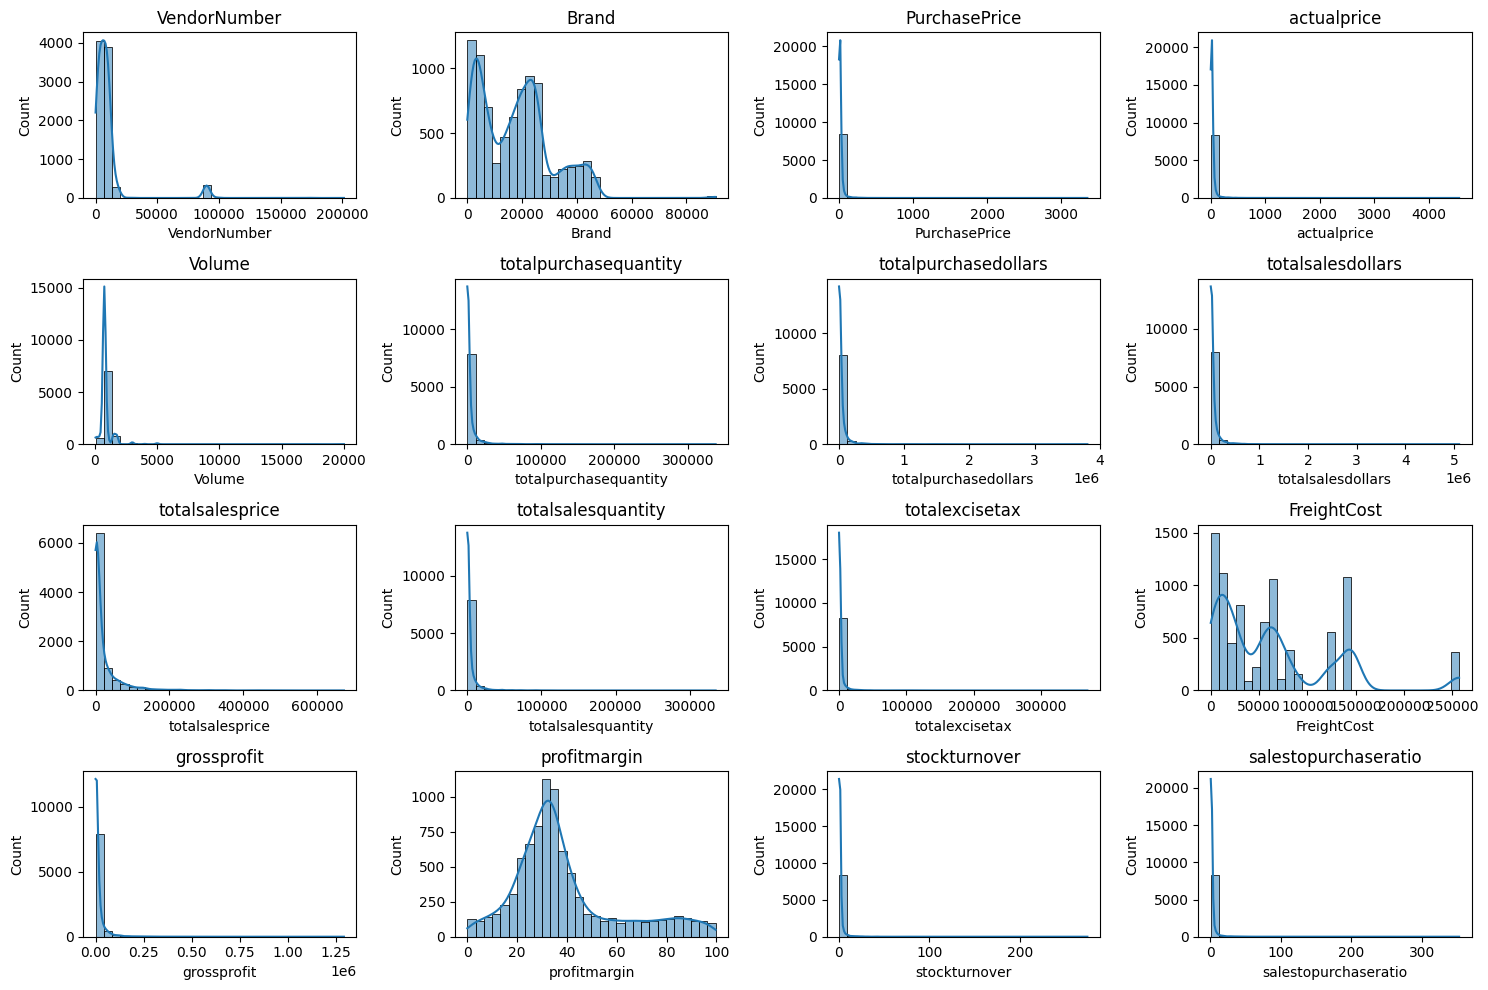

In [18]:
#numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) #adjust grid layout as needed
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

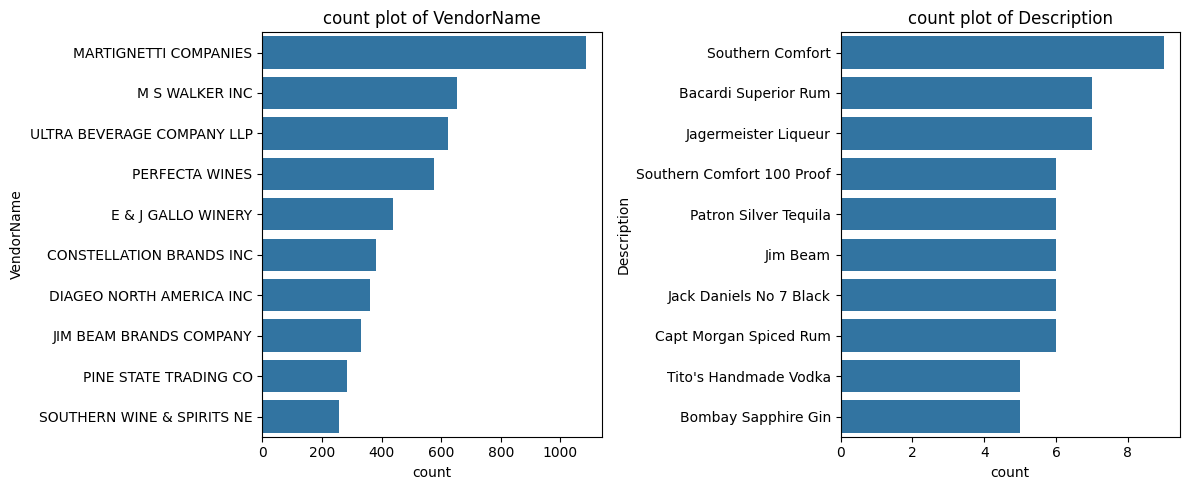

In [19]:
categorical_cols = ['VendorName','Description']

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1) #adjust grid layout as needed
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10]) #top 10 categories
    plt.title(f"count plot of {col}")
plt.tight_layout()
plt.show()

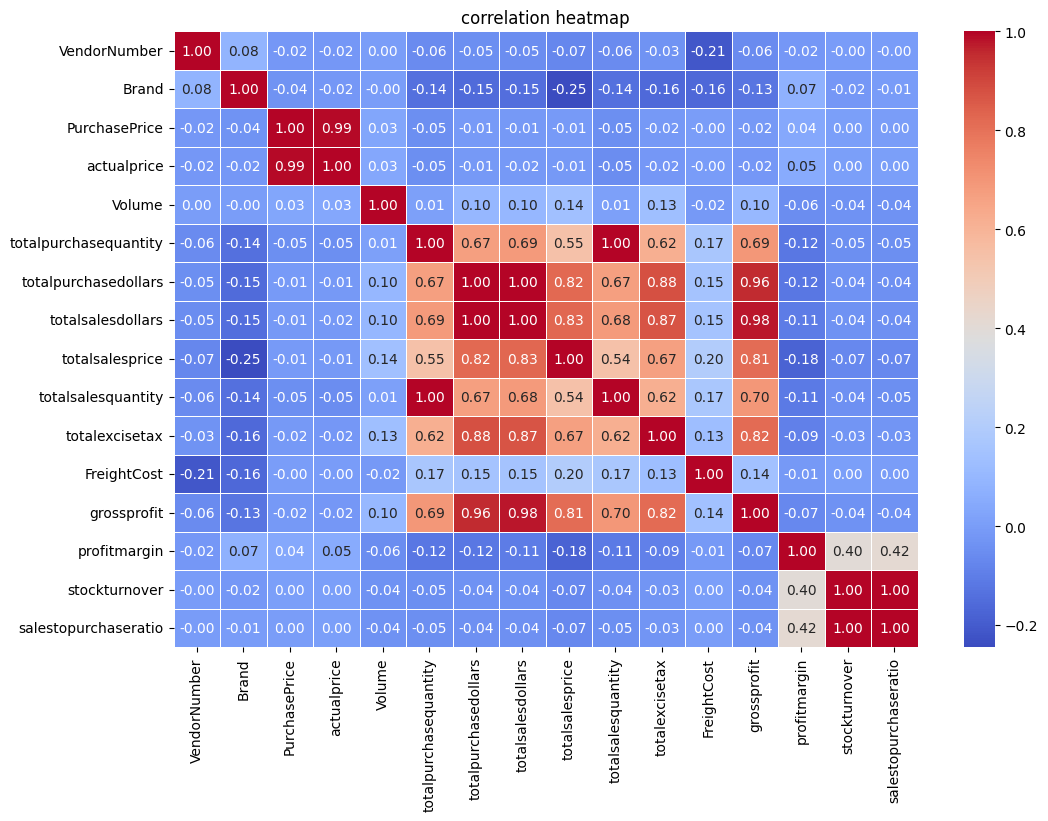

In [20]:
#correlation matrix
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot = True, fmt=".2f",cmap="coolwarm",linewidth=0.5)
plt.title("correlation heatmap")
plt.show()

##Correlation Insights

1. Purchase Price has weak correlations with TotalSales Dollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.
2. Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.
3. Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.
4. Stock Turnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

first business problem
data analysis
1. identify brands that need promotion or pricing adjustments which exhibit lower sales performance but higher profit margins.

In [24]:
brand_performance = df.groupby('Description').agg({
    'totalsalesdollars':'sum',
    'profitmargin':'mean'}).reset_index()

In [26]:
#set a threshold value so as to satisfy our selection of the brand
low_sale_threshold = brand_performance['totalsalesdollars'].quantile(0.15)
high_sale_threshold = brand_performance['profitmargin'].quantile(0.85)

In [27]:
low_sale_threshold

560.299

In [28]:
high_sale_threshold

64.97017552750113

In [29]:
#once the lower and upper bound are found then apply filter accordingly here we're applying filter on totalsalesdollars 
target_brands = brand_performance[
(brand_performance['totalsalesdollars'] <= low_sale_threshold) &
(brand_performance['profitmargin'] >= high_sale_threshold)]

print("brands low sales but high profit margins:")
display(target_brands.sort_values('totalsalesdollars'))

brands low sales but high profit margins:


,Description,totalsalesdollars,profitmargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [36]:
brand_performance = brand_performance[brand_performance['totalsalesdollars']<10000]

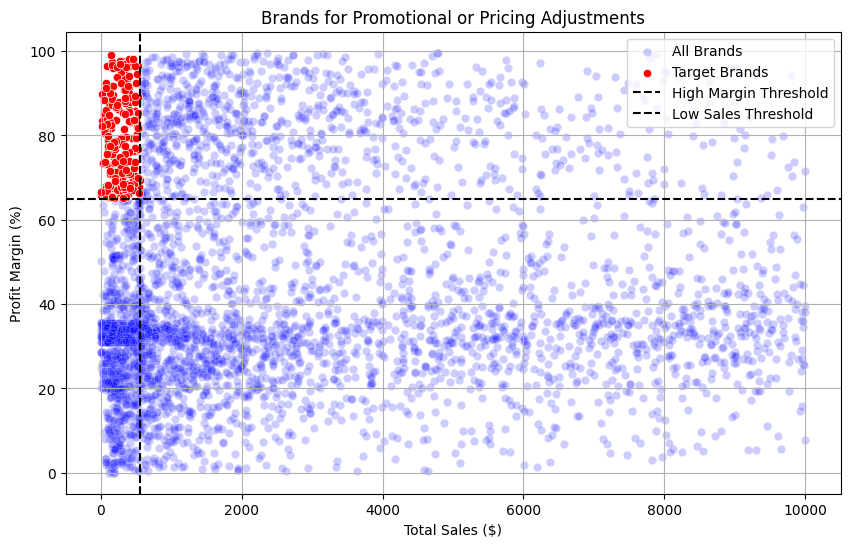

In [37]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=brand_performance, x='totalsalesdollars', y='profitmargin', color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x='totalsalesdollars', y='profitmargin', color="red", label="Target Brands")
#line set for low and high margin
plt.axhline(high_sale_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sale_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

In [45]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)

which vendore and brands demonstrate the high sales performance?

In [39]:
top_vendors = df.groupby('VendorName')['totalsalesdollars'].sum().nlargest(10)
top_brands = df.groupby('Description')['totalsalesdollars'].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: totalsalesdollars, dtype: float64

In [40]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: totalsalesdollars, dtype: float64

In [46]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: totalsalesdollars, dtype: object

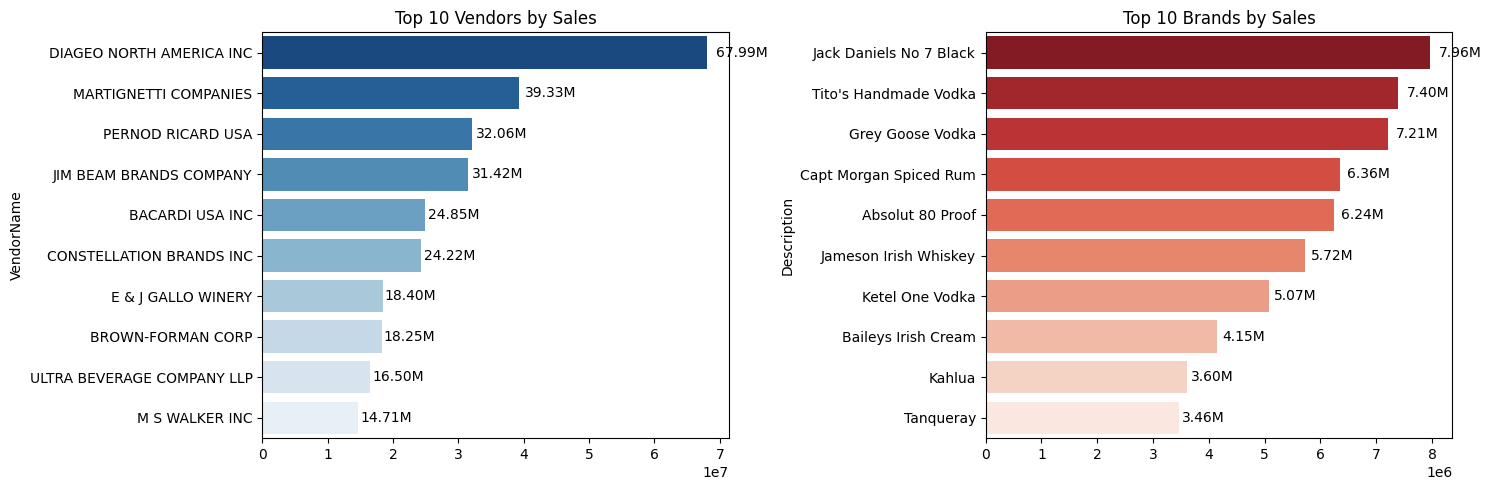

In [48]:
plt.figure(figsize=(15, 5))

#Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width()+ (bar.get_width()*0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

#Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width()+ (bar.get_width()*0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()), 
             ha='left', va='center', fontsize=10, color='black')
plt.tight_layout()
plt.show()

which vendors contribute the most to total purchase dollars?

In [63]:
topvendors = df.groupby('VendorName').agg({
    'totalpurchasedollars':'sum',
    'grossprofit':'sum',
    'totalsalesdollars':'sum'}).reset_index()

In [85]:
topvendors['purchasecontribution']= topvendors['totalpurchasedollars']/topvendors['totalpurchasedollars'].sum()*100

In [88]:
vendor_performance = round(topvendors.sort_values('purchasecontribution',ascending = False),2)

In [89]:
#display top 10 vendors
top_vendors = vendor_performance.head(10)
top_vendors['totalsalesdollars']=top_vendors['totalsalesdollars'].apply(format_dollars)
top_vendors['totalpurchasedollars']=top_vendors['totalpurchasedollars'].apply(format_dollars)
top_vendors['grossprofit']=top_vendors['grossprofit'].apply(format_dollars)
top_vendors

,VendorName,totalpurchasedollars,grossprofit,totalsalesdollars,purchasecontribution
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [90]:
#x = df.groupby('VendorName')['totalpurchasedollars'].sum().nlargest(10)
#x

In [91]:
top_vendors['purchasecontribution'].sum()

65.69000000000001

In [92]:
top_vendors['cummulative_contribution'] = top_vendors['purchasecontribution'].cumsum()
top_vendors

,VendorName,totalpurchasedollars,grossprofit,totalsalesdollars,purchasecontribution,cummulative_contribution
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


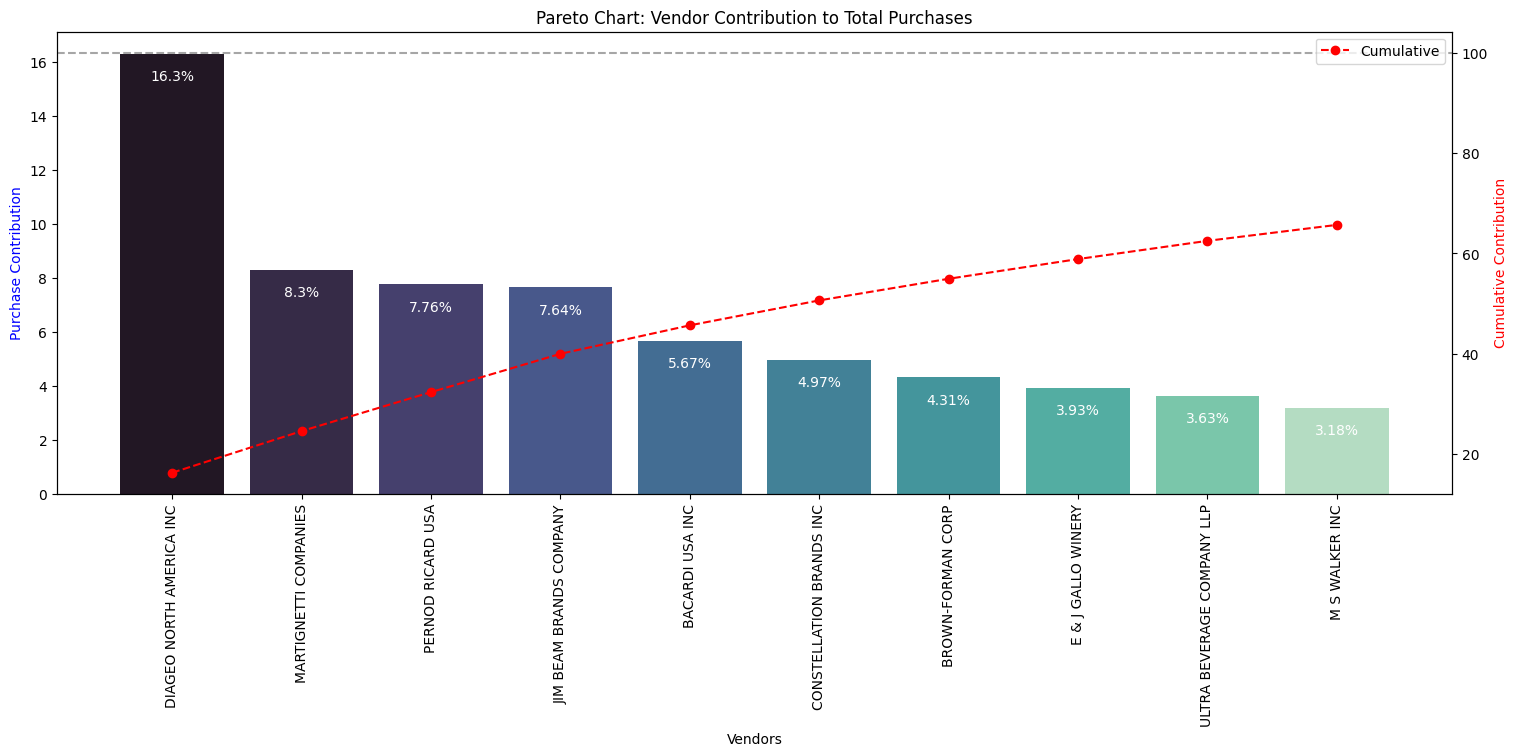

In [93]:
fig, ax1 = plt.subplots (figsize=(18, 6))

#Bar plot for Purchase Contribution
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['purchasecontribution'], palette="mako", ax=ax1)
for i, value in enumerate(top_vendors['purchasecontribution']):
    ax1.text(i, value-1, str(value)+'%', ha='center', fontsize=10, color='white')

#Line Plot for Cumulative Contributions
ax2= ax1.twinx()
ax2.plot(top_vendors['VendorName'],top_vendors['cummulative_contribution'], color='red', marker='o', linestyle='dashed', label='Cumulative')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution', color='blue')
ax2.set_ylabel('Cumulative Contribution', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color="gray", linestyle='dashed', alpha=0.7)
ax2.legend (loc='upper right')

plt.show()

In [95]:
xx = df.groupby('VendorName')['totalpurchasedollars'].sum().nlargest(10)
xx

VendorName
DIAGEO NORTH AMERICA INC      50097226.16
MARTIGNETTI COMPANIES         25502095.83
PERNOD RICARD USA             23851164.17
JIM BEAM BRANDS COMPANY       23494304.32
BACARDI USA INC               17432020.26
CONSTELLATION BRANDS INC      15273708.08
BROWN-FORMAN CORP             13238939.18
E & J GALLO WINERY            12068539.22
ULTRA BEVERAGE COMPANY LLP    11167081.61
M S WALKER INC                 9764312.60
Name: totalpurchasedollars, dtype: float64

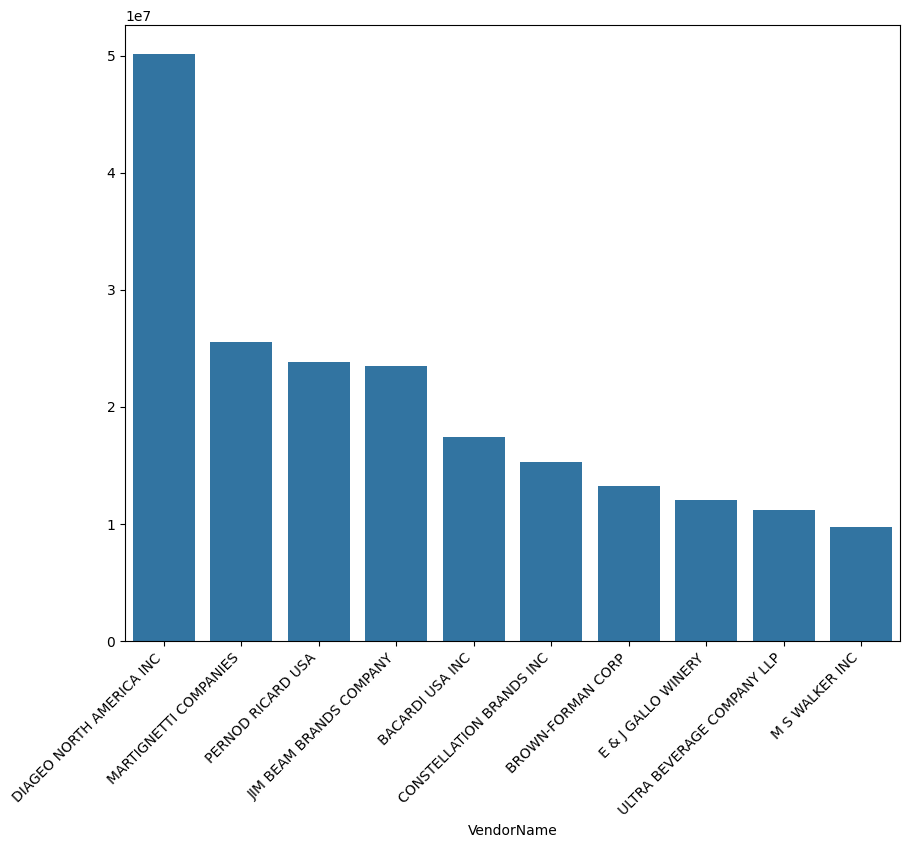

In [101]:
plt.figure(figsize=(10,8))
sns.barplot(x=xx.index,y=xx.values)
plt.yticks(rotation=0, ha="right")
plt.xticks(rotation=45, ha="right")
plt.show()

how much of total procurement is dependent on the top vendors?

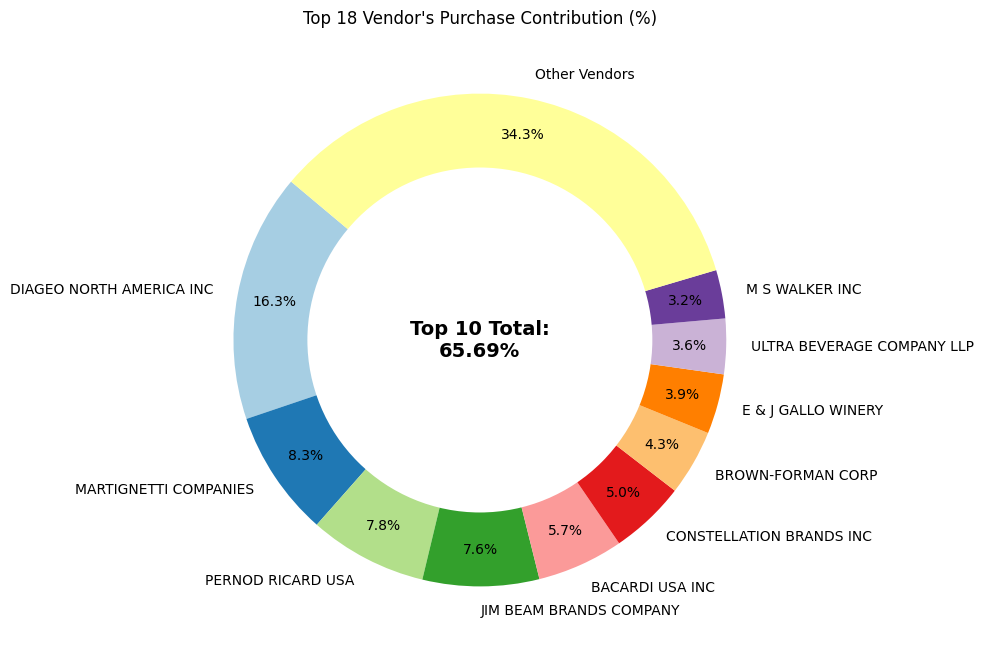

In [106]:
vendors= list(top_vendors['VendorName'].values)
purchasecontributions = list(top_vendors['purchasecontribution'].values)
total_contribution=sum(purchasecontributions)

remaining_contribution=100-total_contribution

#Append "Other Vendors category
vendors.append("Other Vendors")
purchasecontributions.append(remaining_contribution)

#Donut Chart

fig, ax=plt.subplots(figsize=(8, 8))
wedges, texts, autotexts=ax.pie(purchasecontributions, labels=vendors, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

#Draw a white circle in the center to create a "donut" effect
centre_circle= plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

#Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 18 Vendor's Purchase Contribution (%)")
plt.show()

does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [107]:
df['unitpurchaseprice']=df['totalpurchasedollars']/df['totalpurchasequantity']

In [108]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,actualprice,Volume,totalpurchasequantity,totalpurchasedollars,totalsalesdollars,totalsalesprice,totalsalesquantity,totalexcisetax,FreightCost,grossprofit,profitmargin,stockturnover,salestopurchaseratio,unitpurchaseprice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5101919.51,672819.31,142049.0,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4819073.49,561512.37,160247.0,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4538120.60,461140.15,187140.0,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4475972.88,420050.01,200412.0,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4223107.62,545778.28,135838.0,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,15.95,10.96,5.0,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,65.66,1.47,134.0,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,1.98,0.99,2.0,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,143.28,77.61,72.0,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47


In [111]:
df['ordersize']= pd.qcut(df['totalpurchasedollars'],q=3,labels=['small','medium','large'])

In [113]:
df[['ordersize','totalpurchasedollars']]

,ordersize,totalpurchasedollars
0,large,3811251.60
1,large,3804041.22
2,large,3418303.68
3,large,3261197.94
4,large,3023206.01
...,...,...
8559,small,2.64
8560,small,2.34
8561,small,1.48
8562,small,1.47


In [115]:
df.groupby('ordersize')[['unitpurchaseprice']].mean()

,unitpurchaseprice
ordersize,
small,18.962158
medium,30.002908
large,16.380504


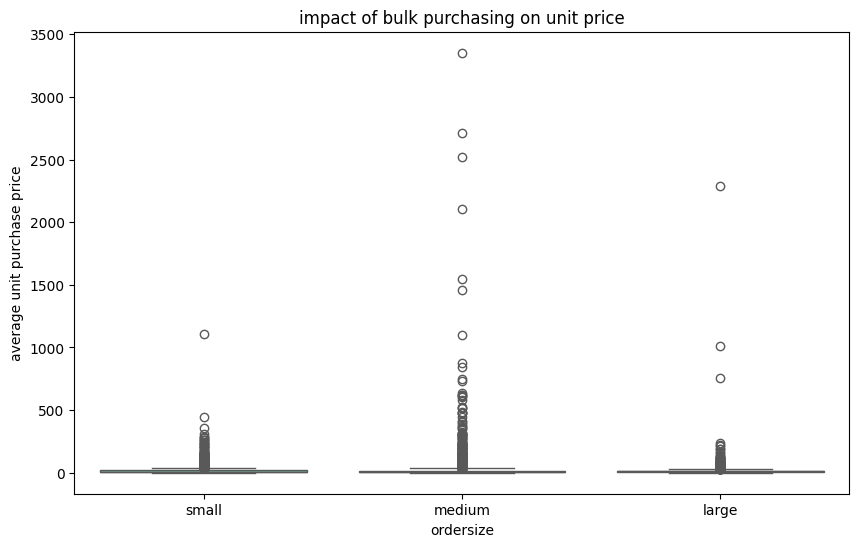

In [119]:
plt.figure(figsize = (10,6))
sns.boxplot(data=df,x='ordersize',y='unitpurchaseprice',palette='Set2')
plt.title('impact of bulk purchasing on unit price')
plt.xlabel('ordersize')
plt.ylabel('average unit purchase price')
plt.show()

which vendor has low inventory turnover, indicating excess stock and slow-moving products?

In [124]:
df[df['stockturnover']<1].groupby('VendorName')['stockturnover'].mean().sort_values(ascending = True).head(10)

VendorName
ALISA CARR BEVERAGES           0.615385
HIGHLAND WINE MERCHANTS LLC    0.708333
PARK STREET IMPORTS LLC        0.751306
Circa Wines                    0.755676
Dunn Wine Brokers              0.766022
CENTEUR IMPORTS LLC            0.773953
SMOKY QUARTZ DISTILLERY LLC    0.783835
TAMWORTH DISTILLING            0.797078
THE IMPORTED GRAPE LLC         0.807569
WALPOLE MTN VIEW WINERY        0.820548
Name: stockturnover, dtype: float64

how much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [129]:
#important
df['unsolvedinventoryvalue']=(df['totalpurchasequantity']-df['totalsalesquantity'])*df['PurchasePrice']
print('total unsolved capital:',format_dollars(df['unsolvedinventoryvalue'].sum()))

total unsolved capital: 2.71M


In [131]:
#aggrefate capital locked per vendor
inventory_value_per_vendor = df.groupby('VendorName')['unsolvedinventoryvalue'].sum().reset_index()
#sort vendors with highest locked capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by='unsolvedinventoryvalue',ascending=False)
inventory_value_per_vendor['unsolvedinventoryvalue'] = inventory_value_per_vendor['unsolvedinventoryvalue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,unsolvedinventoryvalue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


what is the 95% confidence intervals for profit margins of top-performing and low-performing vendors?

In [133]:
top_threshold = df['totalsalesdollars'].quantile(0.75)
low_threshold = df['totalsalesdollars'].quantile(0.25)

In [134]:
top_vendors = df[df['totalsalesdollars']>=top_threshold]['profitmargin'].dropna()
low_vendors = df[df['totalsalesdollars']>=low_threshold]['profitmargin'].dropna()

In [136]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: profitmargin, Length: 2141, dtype: float64

In [144]:
def confidence_interval(data, confidence=0.95):
    mean_val=np.mean(data)
    std_err=np.std(data, ddof=1)/np.sqrt(len(data)) #Standard error
    t_critical=stats.t.ppf((1+ confidence)/2, df=len(data) - 1)
    margin_of_error=t_critical*std_err
    return mean_val, mean_val-margin_of_error, mean_val+margin_of_error

Top Vendors 95% CI: (30.74, 31.61), Mean: 31.18
Low Vendors 95% CI: (37.29, 38.26), Mean: 37.77


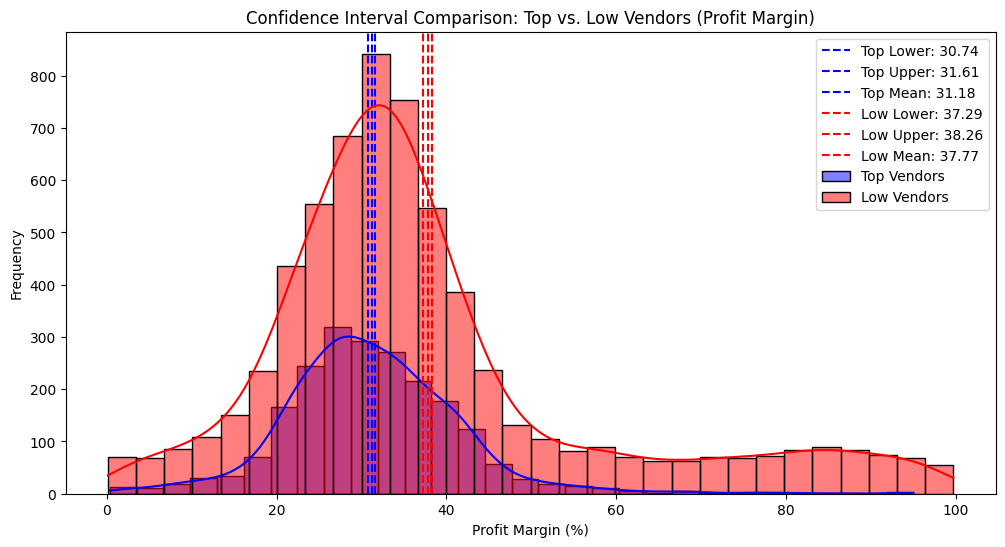

In [151]:
top_mean, top_lower, top_upper= confidence_interval(top_vendors)
low_mean, low_lower, low_upper=confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}") 
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

#Top Vendors Plat
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors") 
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}") 
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}") 
plt.axvline(top_mean, color="blue", linestyle="--", label=f"Top Mean: {top_mean:.2f}")

#Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors") 
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}") 
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}") 
plt.axvline(low_mean, color="red", linestyle="--", label=f"Low Mean: {low_mean:.2f}")

#Finalize Plot

plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt. legend()
plt.show()

hypotheses for confidence levels we saw before

In [152]:
top_threshold = df['totalsalesdollars'].quantile(0.75)
low_threshold = df['totalsalesdollars'].quantile(0.25)

top_vendors = df[df['totalsalesdollars']>=top_threshold]['profitmargin'].dropna()
low_vendors = df[df['totalsalesdollars']>=low_threshold]['profitmargin'].dropna()

t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

print(f"T-static:{t_stat:.4f},p-value:{p_value:.4f}")
if p_value<0.05:
    print("reject hypothesis: there is significant difference in profit margins between low and high performing vendors")
else:
    print("fail to reject hypotheses : no significant difference in profit margins")

T-static:-19.8217,p-value:0.0000
reject hypothesis: there is significant difference in profit margins between low and high performing vendors


In [153]:
df.to_csv("vendor_performance_analysiss.csv",index=False)